# Ch 02 Exercises 

## Performing Logistic Regression with a New Feature and Creating a precision-recall curve

1. Use scikit-learn `train_test_split` to make a new set of training and testing data. This time instead of `LIMIT_BAL` use `EDUCATAION`. (I modified this since I already trained & tested on `LIMIT_BAL`.)
2. Train a logistic regression model using the training data from your split. 
3. Create the array of predicted proabilities for the testing data.
4. Calculate the ROC AUC using the predcited probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `LIMIT_BAL` feature. 
5. Plot the ROC curve.
6. Calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.
7. Plot the precision-recall curve using `matplotlib`.
8. Use scikit-learn to calculate the area under the precision-recall curve.
9. Now recalculate the ROC AUC, except this time do it for the trianing data. How is this different, conceptually and quantitatively, from your earlier calculation?

In [3]:
# import packages
import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.size'] = 12 

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import the data
df = pd.read_csv(r'C:\Users\Lappy\Data Science Projects with Python\00 data\ch01_cleaned_data.csv')

In [12]:
# set logistic regression parameters
my_lr = LogisticRegression(C = 0.1,
                               class_weight = None, 
                               dual = False,
                               fit_intercept = True,
                               intercept_scaling = 1, 
                               max_iter = 100,
                               multi_class = 'auto',
                               n_jobs = None,
                               penalty = 'l2',
                               random_state = None,
                               solver = 'liblinear',
                               tol = 0.0001,
                               verbose = 0,
                               warm_start = False)

In [9]:
# test and train splitting
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), # first argument is features
df['default payment next month'].values, # second argument is the response
test_size = 0.2, # 20% test (and therefore 80% train)
random_state = 24) # random seed

In [13]:
# fitting
my_lr.fit(X_train, y_train);

In [15]:
my_lr.score(X_test,y_test)

0.7834239639977498

In [17]:
P = sum(y_test); P

1155

In [20]:
y_pred_proba = my_lr.predict_proba(X_test); y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [21]:
pos_proba = y_pred_proba[:,1]; pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

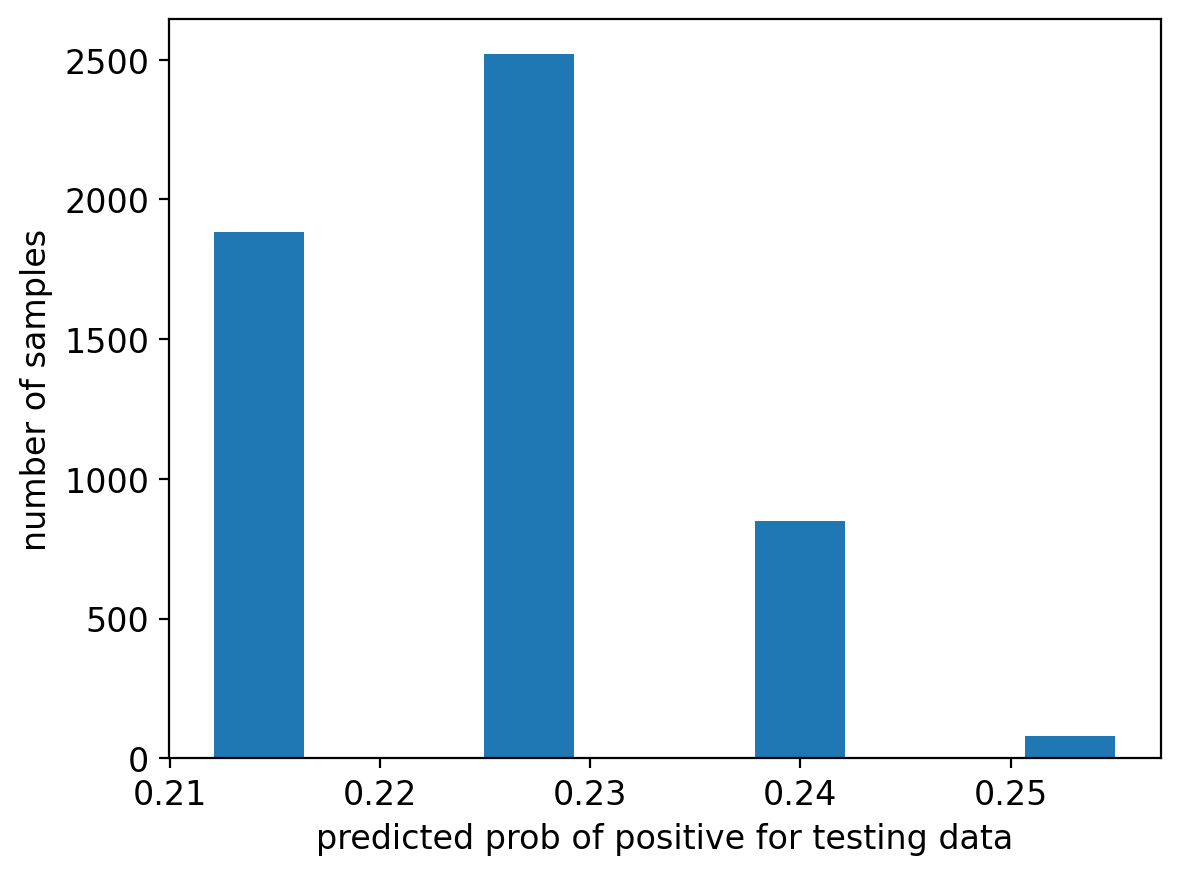

In [22]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('predicted prob of positive for testing data')
plt.ylabel('number of samples');